In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('test.csv', delimiter='|')

<img src="TZ.png">

In [3]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 50
df.head(n=100)

ON_BROADCAST_DATE     STATUS SUBSCRIPTION_END_DATE  \
0         2019-02-02     active            2019-02-09   
1         2019-02-03     active            2019-02-09   
2         2019-02-04     active            2019-02-09   
3         2019-02-05     active            2019-02-09   
4         2019-02-06     active            2019-02-09   
5         2019-02-07     active            2019-02-09   
6         2019-02-08     active            2019-02-09   
7         2019-02-09     active            2019-02-09   
8         2019-02-10     active            2019-03-11   
9         2019-02-11     active            2019-03-11   
10        2019-02-12     active            2019-03-11   
11        2019-02-13     active            2019-03-11   
12        2019-02-14     active            2019-03-11   
13        2019-02-15     active            2019-03-11   
14        2019-02-16     active            2019-03-11   
15        2019-02-17     active            2019-03-11   
16        2019-02-18     active            2019-03-11   
17        2019-02-19     active            2019-03-11   
18        2019-02-20     active            2019-03-11   
19        2019-02-21     active            2019-03-11   
20        2019-02-22     active            2019-03-11   
21        2019-02-23     active            2019-03-11   
22        2019-02-24     active            2019-03-11   
23        2019-02-25     active            2019-03-11   
24        2019-02-26     active            2019-03-11   
25        2019-02-27     active            2019-03-11   
26        2019-02-28     active            2019-03-11   
27        2019-03-01     active            2019-03-11   
28        2019-03-02     active            2019-03-11   
29        2019-03-03     active            2019-03-11   
30        2019-03-04     active            2019-03-11   
31        2019-03-05     active            2019-03-11   
32        2019-03-06     active            2019-03-11   
33        2019-03-07     active            2019-03-11   
34        2019-03-08     active            2019-03-11   
35        2019-03-09     active            2019-03-11   
36        2019-03-10     active            2019-03-11   
37        2019-03-11     active            2019-03-11   
38        2019-03-12  cancelled            2019-03-11   
39        2019-01-21     active            2019-01-28   
40        2019-01-22     active            2019-01-28   
41        2019-01-23     active            2019-01-28   
42        2019-01-24     active            2019-01-28   
43        2019-01-25     active            2019-01-28   
44        2019-01-26     active            2019-01-28   
45        2019-01-27     active            2019-01-28   
46        2019-01-28     active            2019-01-28   
47        2019-01-29     active            2019-02-27   
48        2019-01-30     active            2019-02-27   
49        2019-01-31     active            2019-02-27   
50        2019-02-01     active            2019-02-27   
51        2019-02-02     active            2019-02-27   
52        2019-02-03     active            2019-02-27   
53        2019-02-04     active            2019-02-27   
54        2019-02-05     active            2019-02-27   
55        2019-02-06     active            2019-02-27   
56        2019-02-07     active            2019-02-27   
57        2019-02-08     active            2019-02-27   
58        2019-02-09     active            2019-02-27   
59        2019-02-10     active            2019-02-27   
60        2019-02-11     active            2019-02-27   
61        2019-02-12     active            2019-02-27   
62        2019-02-13     active            2019-02-27   
63        2019-02-14     active            2019-02-27   
64        2019-02-15     active            2019-02-27   
65        2019-02-16     active            2019-02-27   
66        2019-02-17     active            2019-02-27   
67        2019-02-18     active            2019-02-27   
68        2019-02-19     active            2019-02-27   
69        201

Сперва определим как выделить раунд:
    - По строкам, где DAYS_BEFORE_SUBSCRIPTION_END будет == 1, то там конец раунда, однако можно заметить, на протяжении всего раунда PERIOD_RN имеет одно и то же значение.
    - Используя знание о расположении позици, где DAYS_BEFORE_SUBSCRIPTION_END будет == 1 можно посчитать количество закончившихся раундов

Поскольку задача предсказать по окончанию подписки, то неокончившиеся раунды нужно убрать

In [4]:
e99 = df.VELOCITY_1.max() / 10

def get_round(user, rnd_num):
    return user.loc[user.PERIOD_RN == rnd_num]

def get_random_round():
    ind = np.random.randint(0, df.shape[0], 1)
    label = df.iloc[ind].LABEL.values[0]
    user = df.loc[df.LABEL ==  label]
    rand_round = np.random.choice(user.PERIOD_RN.unique(), 1)[0]
    return get_round(user, rand_round)

In [5]:
unfinished_rounds = df.groupby(['LABEL', 'PERIOD_RN']).filter(lambda x: not (1 in x.DAYS_BEFORE_SUBSCRIPTION_END.unique()))

In [6]:
unfinished_rounds

ON_BROADCAST_DATE  STATUS SUBSCRIPTION_END_DATE  \
125            2019-01-29  active            2020-01-28   
126            2019-01-30  active            2020-01-28   
127            2019-01-31  active            2020-01-28   
128            2019-02-01  active            2020-01-28   
129            2019-02-02  active            2020-01-28   
...                   ...     ...                   ...   
2999764        2019-08-22  active            2020-02-24   
2999765        2019-08-23  active            2020-02-24   
2999766        2019-08-24  active            2020-02-24   
2999767        2019-08-25  active            2020-02-24   
2999768        2019-08-26  active            2020-02-24   

         SUBSCRIPTION_ROLLING_DURATION  DAYS_SUBSCRIBED  \
125                              373.0              1.0   
126                              373.0              2.0   
127                              373.0              3.0   
128                              373.0              4.0   
129                              373.0              5.0   
...                                ...              ...   
2999764                          403.0            179.0   
2999765                          403.0            180.0   
2999766                          403.0            181.0   
2999767                          403.0            182.0   
2999768                          403.0            183.0   

         DAYS_BEFORE_SUBSCRIPTION_END  FREE_WEEK_USER  PERC_MINUTES_MOV_ORIG  \
125                               365               1                    0.0   
126                               364               1                    0.0   
127                               363               1                    0.0   
128                               362               1                    0.0   
129                               361               1                    0.0   
...                               ...             ...                    ...   
2999764                           187               1                    0.0   
2999765                           186               1                    0.0   
2999766                           185               1                    0.0   
2999767                           184               1                    0.0   
2999768                           183               1                    0.0   

         PERC_MINUTES_SHORT_ORIG  PERC_MINUTES_TRAILERS_ORIG  VELOCITY_1  \
125                          0.0                         0.0   21.505248   
126                          0.0                         0.0   42.350509   
127                          0.0                         0.0   42.350509   
128                          0.0                         0.0   42.350509   
129                          0.0                         0.0   87.372774   
...                          ...                         ...         ...   
2999764                      0.0                         0.0  100.000000   
2999765                      0.0                         0.0  100.000000   
2999766                      0.0                         0.0  100.000000   
2999767                      0.0                         0.0  100.000000   
2999768                      0.0                         0.0  100.000000   

         VELOCITY_2  VELOCITY_3  PERC_6MIN_DAYS_ALL  PERC_6MIN_DAYS_ACTIVE  \
125       78.494752         0.0               100.0              55.555556   
126       57.649491         0.0               100.0              50.000000   
127       57.649491         0.0               100.0              45.454545   
128       57.649491         0.0               100.0              41.666667   
129       12.627226         0.0               100.0              38.461538   
...             ...         ...                 ...                    ...   
2999764    0.000000         0.0               100.0               0.460829   
2999765    0.000000         0.0               100.0               0.458716   
2999766    0.0

In [7]:
droped_unfinished = df.drop(index=unfinished_rounds.index, axis=0)

In [9]:
df = droped_unfinished

Теперь нужно посмотреть на пропущенные данные и решить что с ними делать

In [10]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count() * 100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

Total     Percent
MOVIES_MINUTES_VIEWED                 1588862  100.000000
MOVIES_STARTED                        1588862  100.000000
SHORT_STARTED                         1288128   81.072365
SHORT_MINUTES_VIEWED                  1288128   81.072365
DAYS_SINCE_LAST_COMPLETED_LONG_FORM    487713   30.695743
DAYS_SINCE_LAST_5MIN                   390123   24.553611
PERC_REPEATED_MINUTES_ALL_LONG_FORMS   321558   20.238259
MAX_LONG_FORM_STARTED                  321558   20.238259
PERC_MINUTES_TRAILERS_ORIG             321558   20.238259
PERC_MINUTES_MOV_ORIG                  321558   20.238259
LONG_MINUTES_VIEWED                    321558   20.238259
PERC_IN_SEASON_MINUTES_TOTAL           321558   20.238259
LONG_STARTED                           321558   20.238259
PERC_TOTAL_LIVE_MIN_VOD                316344   19.910099
ASSETS_STARTED                         308705   19.429315
MINUTES_VIEWED                         308705   19.429315
PERC_6MIN_DAYS_ACTIVE                  308705   19.429315
MOVIES_ACTIVE_DAYS                     308705   19.429315
DAYS_SINCE_LAST                        308705   19.429315
PERC_6MIN_DAYS_ALL                     308705   19.429315
VELOCITY_3                             308705   19.429315
VELOCITY_2                             308705   19.429315
VELOCITY_1                             308705   19.429315
LONG_ACTIVE_DAYS                       308705   19.429315
FIRST_SHOW_MOVIE                       308705   19.429315
FIRST_SHOW_LIBRARY                     308705   19.429315
PERC_MINUTES_SHORT_ORIG                308705   19.429315
ACTIVE_DAYS                            308705   19.429315
SUBSCRIPTION_ROLLING_DURATION               2    0.000126
SUBSCRIPTION_END_DATE                       2    0.000126
DAYS_SUBSCRIBED                             2    0.000126
ROUND_SUB_STATUS                            2    0.000126
SUBSCRIPTION_TYPE                           2    0.000126
PERIOD_RN                                   2    0.000126
PERC_COMPLETED_STARTED_LONG_FORMS           0    0.000000
STATUS                                      0    0.000000
PERC_MOVIES_ALL                             0    0.000000
PERC_COMPLETED_STARTED_MOVIES               0    0.000000
DAYS_BEFORE_SUBSCRIPTION_END                0    0.000000
FREE_WEEK_USER                              0    0.000000
FIRST_SHOW_SEASON_COMPLETED                 0    0.000000
SEASON_COMPLETED                            0    0.000000
FIRST_SHOW                                  0    0.000000
TRIAL_ABILITY                               0    0.000000
TRIAL_BEFORE_SUBSCRIPTION                   0    0.000000
DAYS_SINCE_SUBSCRIPTION                     0    0.000000
LABEL                                       0    0.000000
SEASON_STARTED                              0    0.000000
ON_BROADCAST_DATE                           0    0.000000

Итак:
    - Колонки MOVIES_MINUTES_VIEWED, MOVIES_STARTED можно смело убирать из датасета, они бесполезны
    - Колонки SHORT_STARTED, SHORT_MINUTES_VIEWED стоило бы сперва проанализировать, судя по названию они могут быть полезны

Some stats for SHORT_STARTED:
Zero values: 0
Mean: 4.045445476733592
STD: 11.374236574938813

Some stats for SHORT_MINUTES_VIEWED:
Zero values: 16169
Mean: 3.1854604068711905
STD: 10.139226000896858



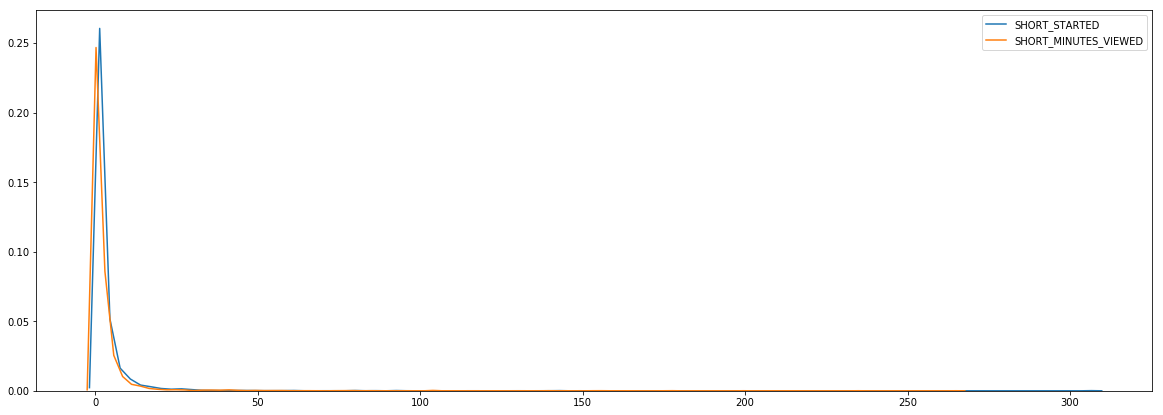

In [12]:
plt.figure(figsize=(20, 7))
col_names = ['SHORT_STARTED','SHORT_MINUTES_VIEWED']
for col in col_names:
    filtered = df[col].dropna()
    print("Some stats for {}:\nZero values: {}\nMean: {}\nSTD: {}\n".format(col, filtered.loc[filtered == 0].count(), filtered.mean(), filtered.std()))
    sns.kdeplot(filtered)

Судя по описанию столбцов было бы неплохо оставить их в датасете, поскольку он может быть значимыми. Осталось выбрать значение на которое будет заменен NaN. Поскольку 0 достаточно часто встречается в столбце __SHORT_MINUTES_VIEWED__ я выбрал значение -1.

In [10]:
missing_columns = missing_data.loc[(missing_data.Percent > 15) & (missing_data.Percent < 35)].index.tolist()
missing_columns

['DAYS_SINCE_LAST_COMPLETED_LONG_FORM',
 'DAYS_SINCE_LAST_5MIN',
 'PERC_REPEATED_MINUTES_ALL_LONG_FORMS',
 'MAX_LONG_FORM_STARTED',
 'PERC_MINUTES_TRAILERS_ORIG',
 'PERC_MINUTES_MOV_ORIG',
 'LONG_MINUTES_VIEWED',
 'PERC_IN_SEASON_MINUTES_TOTAL',
 'LONG_STARTED',
 'PERC_TOTAL_LIVE_MIN_VOD',
 'ASSETS_STARTED',
 'MINUTES_VIEWED',
 'PERC_6MIN_DAYS_ACTIVE',
 'MOVIES_ACTIVE_DAYS',
 'DAYS_SINCE_LAST',
 'PERC_6MIN_DAYS_ALL',
 'VELOCITY_3',
 'VELOCITY_2',
 'VELOCITY_1',
 'LONG_ACTIVE_DAYS',
 'FIRST_SHOW_MOVIE',
 'FIRST_SHOW_LIBRARY',
 'PERC_MINUTES_SHORT_ORIG',
 'ACTIVE_DAYS']

In [11]:
def bar_plotter(data, fillna=False):
    if fillna:
        data = data.fillna('NaN')
    z = data.value_counts()
    sns.barplot(z.index, z.values)
    
def get_missing_col_by_dtype(dtype):
    dtype_columns = df.select_dtypes(include=dtype).columns.tolist()
    missing_dtype_columns = list(set(missing_columns) & set(dtype_columns))
    return missing_dtype_columns

Буду разбираться с данными по отдельности, исходя из их типа. Сперва разберусь со строковыми данными, ведь это просто данные по категориям.

In [12]:
missing_string_columns = get_missing_col_by_dtype(['object'])
missing_string_columns

['FIRST_SHOW_MOVIE', 'FIRST_SHOW_LIBRARY']

In [13]:
def plot_bar_missing_col(miss_cols):
    sz = len(miss_cols)
    plt.figure(figsize=(5 * sz, 5))
    for i in range(sz):
        col = miss_cols[i]
        plt.subplot(sz, 1, i+1)
        plt.subplots_adjust(hspace = 0.5)
        plt.title(col)
        bar_plotter(df[col], fillna=True)

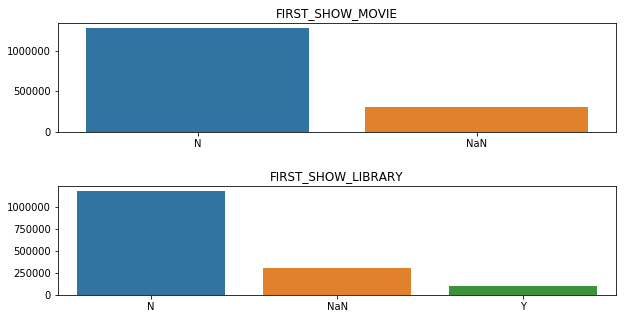

In [17]:
plot_bar_missing_col(missing_string_columns)

Как видно мало пропущенных данных. Можно было бы вынести NaN в отдельную категорию, но не стоит торопиться с выводами.

In [14]:
missing_int_columns = get_missing_col_by_dtype(['int64'])
missing_int_columns

[]

In [15]:
missing_float_columns = get_missing_col_by_dtype(['float64'])
missing_float_columns

['PERC_6MIN_DAYS_ACTIVE',
 'PERC_6MIN_DAYS_ALL',
 'ACTIVE_DAYS',
 'MAX_LONG_FORM_STARTED',
 'VELOCITY_1',
 'LONG_STARTED',
 'PERC_REPEATED_MINUTES_ALL_LONG_FORMS',
 'VELOCITY_2',
 'PERC_MINUTES_TRAILERS_ORIG',
 'LONG_ACTIVE_DAYS',
 'MOVIES_ACTIVE_DAYS',
 'ASSETS_STARTED',
 'DAYS_SINCE_LAST',
 'VELOCITY_3',
 'PERC_TOTAL_LIVE_MIN_VOD',
 'LONG_MINUTES_VIEWED',
 'MINUTES_VIEWED',
 'PERC_MINUTES_MOV_ORIG',
 'DAYS_SINCE_LAST_COMPLETED_LONG_FORM',
 'PERC_IN_SEASON_MINUTES_TOTAL',
 'DAYS_SINCE_LAST_5MIN',
 'PERC_MINUTES_SHORT_ORIG']

Тут посложнее. Сперва нужно посмотреть какого типа пропуски: 
    - пропуск в случайной строках(но не всех) внутри одного раунда.
    - пропуск всех значений в рамках одного раунда.

In [18]:
def null_round_stats(x):
    is_null = x.isnull().sum(axis = 0)
    full_null = is_null == len(x)
    null_ratio = is_null / len(x)
    q = pd.concat([is_null, full_null, null_ratio], axis=1, keys=['is_null', 'full_null', 'null_ratio'], sort=False)
    return q


null_table = df.groupby(['LABEL', 'PERIOD_RN']).apply(null_round_stats)

In [19]:
null_table

is_null  full_null  \
LABEL            PERIOD_RN                                                     
163997 711949 1  1.0       ON_BROADCAST_DATE                    0      False   
                           STATUS                               0      False   
                           SUBSCRIPTION_END_DATE                0      False   
                           SUBSCRIPTION_ROLLING_DURATION        0      False   
                           DAYS_SUBSCRIBED                      0      False   
...                                                           ...        ...   
1714195 995273 1 1.0       MOVIES_ACTIVE_DAYS                   0      False   
                           PERC_COMPLETED_STARTED_MOVIES        0      False   
                           PERC_MOVIES_ALL                      0      False   
                           LABEL                                0      False   
                           ROUND_SUB_STATUS                     0      False   

                                                          null_ratio  
LABEL            PERIOD_RN                                            
163997 711949 1  1.0       ON_BROADCAST_DATE                     0.0  
                           STATUS                                0.0  
                           SUBSCRIPTION_END_DATE                 0.0  
                           SUBSCRIPTION_ROLLING_DURATION         0.0  
                           DAYS_SUBSCRIBED                       0.0  
...                                                              ...  
1714195 995273 1 1.0       MOVIES_ACTIVE_DAYS                    0.0  
                           PERC_COMPLETED_STARTED_MOVIES         0.0  
                           PERC_MOVIES_ALL                       0.0  
                           LABEL                                 0.0  
                           ROUND_SUB_STATUS                      0.0  

[3226650 rows x 3 columns]

In [20]:
particle_null = null_table.loc[(null_table.null_ratio > 0) & (null_table.null_ratio < 1)]
full_null = null_table.loc[null_table.full_null == True]

In [21]:
particle_null

is_null  \
LABEL            PERIOD_RN                                                 
163999 711951 1  1.0       DAYS_SINCE_LAST_COMPLETED_LONG_FORM         4   
164001 711953 1  1.0       PERC_MINUTES_MOV_ORIG                       1   
                           PERC_MINUTES_SHORT_ORIG                     1   
                           PERC_MINUTES_TRAILERS_ORIG                  1   
                           VELOCITY_1                                  1   
...                                                                  ...   
1714191 995269 1 8.0       MAX_LONG_FORM_STARTED                      10   
                           PERC_IN_SEASON_MINUTES_TOTAL               10   
                           PERC_REPEATED_MINUTES_ALL_LONG_FORMS       10   
                           LONG_STARTED                               10   
                           LONG_MINUTES_VIEWED                        10   

                                                                 full_null  \
LABEL            PERIOD_RN                                                   
163999 711951 1  1.0       DAYS_SINCE_LAST_COMPLETED_LONG_FORM       False   
164001 711953 1  1.0       PERC_MINUTES_MOV_ORIG                     False   
                           PERC_MINUTES_SHORT_ORIG                   False   
                           PERC_MINUTES_TRAILERS_ORIG                False   
                           VELOCITY_1                                False   
...                                                                    ...   
1714191 995269 1 8.0       MAX_LONG_FORM_STARTED                     False   
                           PERC_IN_SEASON_MINUTES_TOTAL              False   
                           PERC_REPEATED_MINUTES_ALL_LONG_FORMS      False   
                           LONG_STARTED                              False   
                           LONG_MINUTES_VIEWED                       False   

                                                                 null_ratio  
LABEL            PERIOD_RN                                                   
163999 711951 1  1.0       DAYS_SINCE_LAST_COMPLETED_LONG_FORM     0.500000  
164001 711953 1  1.0       PERC_MINUTES_MOV_ORIG                   0.125000  
                           PERC_MINUTES_SHORT_ORIG                 0.125000  
                           PERC_MINUTES_TRAILERS_ORIG              0.125000  
                           VELOCITY_1                              0.125000  
...                                                                     ...  
1714191 995269 1 8.0       MAX_LONG_FORM_STARTED                   0.322581  
                           PERC_IN_SEASON_MINUTES_TOTAL            0.322581  
                           PERC_REPEATED_MINUTES_ALL_LONG_FORMS    0.322581  
                           LONG_STARTED                            0.322581  
                           LONG_MINUTES_VIEWED                     0.322581  

[97253 rows x 3 columns]

In [250]:
usr = get_round(df.loc[df.LABEL == '1714191 995269 1'], 4)

In [74]:
usr

ON_BROADCAST_DATE  STATUS SUBSCRIPTION_END_DATE  \
2194041        2019-03-27  active            2019-04-26   
2194042        2019-03-28  active            2019-04-26   
2194043        2019-03-29  active            2019-04-26   
2194044        2019-03-30  active            2019-04-26   
2194045        2019-03-31  active            2019-04-26   
2194046        2019-04-01  active            2019-04-26   
2194047        2019-04-02  active            2019-04-26   
2194048        2019-04-03  active            2019-04-26   
2194049        2019-04-04  active            2019-04-26   
2194050        2019-04-05  active            2019-04-26   
2194051        2019-04-06  active            2019-04-26   
2194052        2019-04-07  active            2019-04-26   
2194053        2019-04-08  active            2019-04-26   
2194054        2019-04-09  active            2019-04-26   
2194055        2019-04-10  active            2019-04-26   
2194056        2019-04-11  active            2019-04-26   
2194057        2019-04-12  active            2019-04-26   
2194058        2019-04-13  active            2019-04-26   
2194059        2019-04-14  active            2019-04-26   
2194060        2019-04-15  active            2019-04-26   
2194061        2019-04-16  active            2019-04-26   
2194062        2019-04-17  active            2019-04-26   
2194063        2019-04-18  active            2019-04-26   
2194064        2019-04-19  active            2019-04-26   
2194065        2019-04-20  active            2019-04-26   
2194066        2019-04-21  active            2019-04-26   
2194067        2019-04-22  active            2019-04-26   
2194068        2019-04-23  active            2019-04-26   
2194069        2019-04-24  active            2019-04-26   
2194070        2019-04-25  active            2019-04-26   
2194071        2019-04-26  active            2019-04-26   

         SUBSCRIPTION_ROLLING_DURATION  DAYS_SUBSCRIBED  \
2194041                           98.0              1.0   
2194042                           98.0              2.0   
2194043                           98.0              3.0   
2194044                           98.0              4.0   
2194045                           98.0              5.0   
2194046                           98.0              6.0   
2194047                           98.0              7.0   
2194048                           98.0              8.0   
2194049                           98.0              9.0   
2194050                           98.0             10.0   
2194051                           98.0             11.0   
2194052                           98.0             12.0   
2194053                           98.0             13.0   
2194054                           98.0             14.0   
2194055                           98.0             15.0   
2194056                           98.0             16.0   
2194057                           98.0             17.0   
2194058                           98.0             18.0   
2194059                           98.0             19.0   
2194060                           98.0             20.0   
2194061                           98.0             21.0   
2194062                           98.0             22.0   
2194063                           98.0             23.0   
2194064                           98.0             24.0   
2194065                           98.0             25.0   
2194066                           98.0             26.0   
2194067                           98.0             27.0   
2194068                           98.0             28.0   
2194069                           98.0             29.0   
2194070                           98.0             30.0   
2194071                           98.0             31.0   

         DAYS_BEFORE_SUBSCRIPTION_END  FREE_WEEK_USER  PERC_MINUTES_MOV_ORIG  \
2194041                            31               1                    NaN   
2194042                            30               1                 

Выбрав "подозрительный" раунд убеждаемся, что не везде где не полностью NaN значения адекватны. Значит теперь нужно смотреть не только NaN, но и признаки сбоев в арифметике с плавающей точкой(+-inf, +-0 в некоторых ячейках, очень большие числа). Если после перепроверки окажется, что если в столбце есть NaN, то и все остальные значения неадекватны, то можно будет просто заменить NaN и другой мусор на какое-нибудь другое число, иначе придется интерполировать пропуски


In [26]:
for col in missing_float_columns:
    print(df[col].describe(), "\n")

count    1.267304e+06
mean     5.188404e-01
std      4.457058e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+02
Name: PERC_IN_SEASON_MINUTES_TOTAL, dtype: float64 

count    1.280157e+06
mean     8.143453e+01
std      2.771070e+01
min      0.000000e+00
25%      7.272727e+01
50%      1.000000e+02
75%      1.000000e+02
max      1.000000e+02
Name: PERC_6MIN_DAYS_ALL, dtype: float64 

count    1.280157e+06
mean     3.752791e+01
std      7.258610e+01
min      1.000000e+00
25%      1.000000e+01
50%      2.200000e+01
75%      4.400000e+01
max      4.751000e+03
Name: ASSETS_STARTED, dtype: float64 

count    1.280157e+06
mean     6.883277e+00
std      8.988920e+00
min      1.000000e+00
25%      2.000000e+00
50%      4.000000e+00
75%      8.000000e+00
max      1.570000e+02
Name: ACTIVE_DAYS, dtype: float64 

count    1.280157e+06
mean     6.761031e+00
std      8.892007e+00
min      0.000000e+00
25%      2.000000e+00
50%      4.0000

In [43]:
nan_maxes = [df[col].max() for col in missing_float_columns]
nan_maxes

[100.0,
 100.0,
 4751.0,
 157.0,
 157.0,
 0.0,
 442.0,
 1.0000000000000006e+100,
 466.0,
 38439.2,
 1.0000000000000006e+100,
 529.0,
 0.41860465116279,
 460.0,
 38439.2,
 0.0,
 98.797017974706,
 1.0000000000000006e+100,
 4751.0,
 1.0000000000000006e+100,
 100.0,
 1.0000000000000006e+100]

In [44]:
overflow_col = [col for col in missing_float_columns if df[col].max() > e99]
overflow_col

['VELOCITY_1',
 'PERC_TOTAL_LIVE_MIN_VOD',
 'PERC_MINUTES_SHORT_ORIG',
 'VELOCITY_2',
 'VELOCITY_3']

Вот и колонки, в которых были обнаружены признаки переполнения. Они пригодятся позже.

Но перед этим построим построим таблицу, в которой будет отображено соотношение всех NaN в столбце и NaN'ов, которые заполняют весь раунд. Если оно будет близко к 1, то можно просто заменить NaN на какую-нибудь константу, которая нигде не встречается.

In [28]:
col_null_cnt = []
for col in df.columns:
    cnt = 0
    try:
        cnt = null_table.loc[null_table.full_null == True].is_null[:,:, col].sum() / df[col].isnull().count() * 100
    except:
        pass
    col_null_cnt.append(cnt)
round_null = pd.DataFrame({'Percent' : col_null_cnt}, index=df.columns).sort_values(by='Percent', ascending=False)

In [29]:
ratio = pd.DataFrame(round_null['Percent'] / missing_data['Percent']).sort_values(by='Percent', ascending=False)

In [30]:
# Пропускаем MOVIES_MINUTES_VIEWED, MOVIES_STARTED(там где 100% пропусков), поскольку они собьют график при визуализации.
ratio = ratio.loc[(ratio['Percent'] > 0) & (~ratio['Percent'].isna())][2:]
ratio

Percent
SHORT_STARTED                         0.985204
SHORT_MINUTES_VIEWED                  0.985204
DAYS_SINCE_LAST_COMPLETED_LONG_FORM   0.934125
DAYS_SINCE_LAST_5MIN                  0.923870
ACTIVE_DAYS                           0.916318
MOVIES_ACTIVE_DAYS                    0.916318
VELOCITY_2                            0.916318
VELOCITY_1                            0.916318
PERC_MINUTES_SHORT_ORIG               0.916318
ASSETS_STARTED                        0.916318
PERC_6MIN_DAYS_ACTIVE                 0.916318
PERC_6MIN_DAYS_ALL                    0.916318
MINUTES_VIEWED                        0.916318
LONG_ACTIVE_DAYS                      0.916318
DAYS_SINCE_LAST                       0.916318
FIRST_SHOW_LIBRARY                    0.916318
FIRST_SHOW_MOVIE                      0.916318
VELOCITY_3                            0.916318
PERC_TOTAL_LIVE_MIN_VOD               0.915889
PERC_MINUTES_MOV_ORIG                 0.912510
PERC_MINUTES_TRAILERS_ORIG            0.912510
PERC_REPEATED_MINUTES_ALL_LONG_FORMS  0.912510
MAX_LONG_FORM_STARTED                 0.912510
PERC_IN_SEASON_MINUTES_TOTAL          0.912510
LONG_MINUTES_VIEWED                   0.912510
LONG_STARTED                          0.912510

         Percent
count  26.000000
mean    0.921551
std     0.019240
min     0.912510
25%     0.913355
50%     0.916318
75%     0.916318
max     0.985204


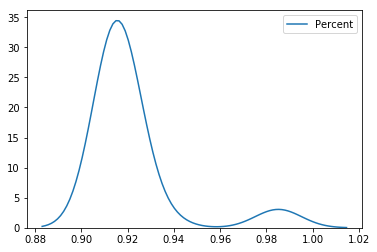

In [31]:
print(ratio.describe())
sns.kdeplot(ratio['Percent'])

Как видно 92% NaN-ов это полностью испорченные колонки в раунде, к тому же как выше выяснилось иногда помимо NaN-ов в колонках могут быть и другие испорченные данные(1е100), так что надежнее всего будет заменить их на какое-нибудь число, которые не пересекается с обычным диапазоном данных. Но перед этим построим распределение в колонках по количеству уникальных значений в каждом раунде, при условии, что в этом столбце есть хоть одно пропущенное значение. Это пригодится, чтобы увидеть насколько разнообразны данные в колонках, где есть пропуски. 

In [16]:
float_columns = df.select_dtypes(include=['float64']).columns.tolist()
global_min = min([df[col].min() for col in float_columns])
global_min

0.0

In [71]:
def count_nans_nunique(z):
    return z.nunique() * z.isnull().sum().apply(lambda x: 1 if x else 0)

In [90]:
#nuniq_with_nans = df.groupby(['LABEL', 'PERIOD_RN']).apply(count_nans_nunique)
#nuniq_with_nans.to_csv('nuniq_with_nans.csv')
nuniq_with_nans = pd.read_csv('nuniq_with_nans.csv')

In [91]:
nuniq_with_nans

LABEL  PERIOD_RN  ON_BROADCAST_DATE  STATUS  \
0       163997 711949 1        1.0                  0       0   
1       163997 711949 1        2.0                  0       0   
2       163998 711950 1        1.0                  0       0   
3       163999 711951 1        1.0                  0       0   
4       164000 711952 1        1.0                  0       0   
...                 ...        ...                ...     ...   
65845  1714192 995270 1        6.0                  0       0   
65846  1714192 995270 1        7.0                  0       0   
65847  1714193 995271 1        1.0                  0       0   
65848  1714194 995272 1        1.0                  0       0   
65849  1714195 995273 1        1.0                  0       0   

       SUBSCRIPTION_END_DATE  SUBSCRIPTION_ROLLING_DURATION  DAYS_SUBSCRIBED  \
0                          0                              0                0   
1                          0                              0                0   
2                          0                              0                0   
3                          0                              0                0   
4                          0                              0                0   
...                      ...                            ...              ...   
65845                      0                              0                0   
65846                      0                              0                0   
65847                      0                              0                0   
65848                      0                              0                0   
65849                      0                              0                0   

       DAYS_BEFORE_SUBSCRIPTION_END  FREE_WEEK_USER  PERC_MINUTES_MOV_ORIG  \
0                                 0               0                      0   
1                                 0               0                      0   
2                                 0               0                      0   
3                                 0               0                      0   
4                                 0               0                      0   
...                             ...             ...                    ...   
65845                             0               0                      0   
65846                             0               0                      0   
65847                             0               0                      0   
65848                             0               0                      0   
65849                             0               0                      0   

       PERC_MINUTES_SHORT_ORIG  PERC_MINUTES_TRAILERS_ORIG  VELOCITY_1  \
0                            0                           0           0   
1                            0                           0           0   
2                            0                           0           0   
3                            0                           0           0   
4                            0                           0           0   
...                        ...                         ...         ...   
65845                        0                           0           0   
65846                        0                           0           0   
65847                        0                           0           0   
65848                        0                           0           0   
65849                        0                           0           0   

       VELOCITY_2  VELOCITY_3  PERC_6MIN_DAYS_ALL  PERC_6MIN_DAYS_ACTIVE  \
0               0           0                   0                      0   
1               0           0                   0                      0   
2               0           0                   0                      0   
3               0           0                   0                      0   
4               0           0                   0                     

PERC_MINUTES_MOV_ORIG column contains only 1 unqiue value also N
Is it string? False
MOVIES_ACTIVE_DAYS column contains only 1 unqiue value also N
Is it string? False
FIRST_SHOW_MOVIE column contains only 1 unqiue value also N
Is it string? True


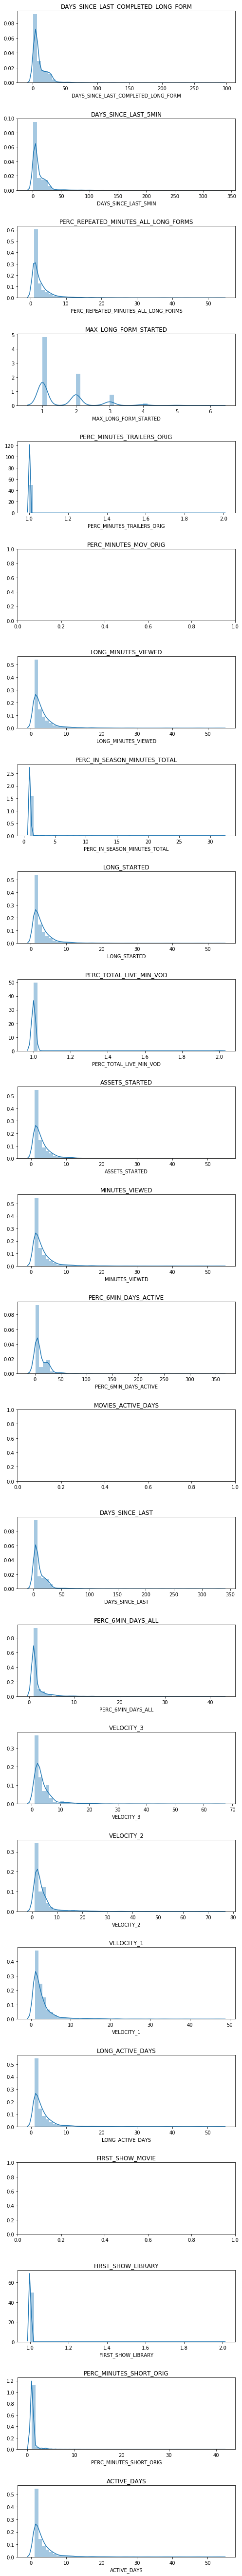

In [108]:
def miss_stats(colls):
    sz = len(colls)
    plt.figure(figsize=(8, 4 * sz))
    for i in range(sz):
        col = colls[i]
        plt.subplot(sz, 1, i+1)
        plt.subplots_adjust(hspace = 0.5)
        plt.title(col)
        z = nuniq_with_nans[col]
        without_zeros = z.loc[z > 0]
        if without_zeros.nunique() > 1:
            sns.distplot(without_zeros)
        else:
            print("{} column contains only 1 unqiue value also N\nIs it string? {}".format(col, col in missing_string_columns))

miss_stats(missing_columns)

Как видно, зачастую в раундах содержится больше 1(помимо самого NaN) значения, так что это эти данные стоило бы сохранить. 

Теперь думаю можно делать выводы и строить алгоритм очистки данных.
    - В столбцах, полностью состоящих из NaN, либо NaN + inf/1e100 и т.д. NaN заменять на константу, не встречающуюся в оригинальном датасете
    - В столбцах, где помимо NaN содержится только одно уникальное значение, заменять NaN на оставшееся значение
    - В столбцах, где имеется несколько других значений интерполировать NaN, а в случаях со строковыми данными заменять на максимально встречающуюся строку

In [17]:
start_values = df.loc[df.DAYS_SUBSCRIBED == 1, missing_float_columns]
end_values = df.loc[df.DAYS_BEFORE_SUBSCRIPTION_END == 1, missing_float_columns]

In [1]:
start_values = df.loc[df.DAYS_SUBSCRIBED == 1, missing_float_columns]
end_values = df.loc[df.DAYS_BEFORE_SUBSCRIPTION_END == 1, missing_float_columns]

interpolate_start_val = dict()
interpolate_end_val = dict()

for col in missing_float_columns:
    # pd.interpolate не может работать, когда NaN стоит в начале или в конце данных,
    # поэтому подготавливаю заглушки для таких случаев
    z = start_values[col]
    interpolate_start_val[col] = z.loc[z < e99 * 10].mean()
    z = start_values[col]
    interpolate_end_val[col] = z.loc[z < e99 * 10].mean()

NameError: name 'df' is not defined

In [252]:
# Тот самый подозрительный раунд
usr = get_round(df.loc[df.LABEL == '1714191 995269 1'], 4)
usr

ON_BROADCAST_DATE  STATUS SUBSCRIPTION_END_DATE  \
2194041        2019-03-27  active            2019-04-26   
2194042        2019-03-28  active            2019-04-26   
2194043        2019-03-29  active            2019-04-26   
2194044        2019-03-30  active            2019-04-26   
2194045        2019-03-31  active            2019-04-26   
2194046        2019-04-01  active            2019-04-26   
2194047        2019-04-02  active            2019-04-26   
2194048        2019-04-03  active            2019-04-26   
2194049        2019-04-04  active            2019-04-26   
2194050        2019-04-05  active            2019-04-26   
2194051        2019-04-06  active            2019-04-26   
2194052        2019-04-07  active            2019-04-26   
2194053        2019-04-08  active            2019-04-26   
2194054        2019-04-09  active            2019-04-26   
2194055        2019-04-10  active            2019-04-26   
2194056        2019-04-11  active            2019-04-26   
2194057        2019-04-12  active            2019-04-26   
2194058        2019-04-13  active            2019-04-26   
2194059        2019-04-14  active            2019-04-26   
2194060        2019-04-15  active            2019-04-26   
2194061        2019-04-16  active            2019-04-26   
2194062        2019-04-17  active            2019-04-26   
2194063        2019-04-18  active            2019-04-26   
2194064        2019-04-19  active            2019-04-26   
2194065        2019-04-20  active            2019-04-26   
2194066        2019-04-21  active            2019-04-26   
2194067        2019-04-22  active            2019-04-26   
2194068        2019-04-23  active            2019-04-26   
2194069        2019-04-24  active            2019-04-26   
2194070        2019-04-25  active            2019-04-26   
2194071        2019-04-26  active            2019-04-26   

         SUBSCRIPTION_ROLLING_DURATION  DAYS_SUBSCRIBED  \
2194041                           98.0              1.0   
2194042                           98.0              2.0   
2194043                           98.0              3.0   
2194044                           98.0              4.0   
2194045                           98.0              5.0   
2194046                           98.0              6.0   
2194047                           98.0              7.0   
2194048                           98.0              8.0   
2194049                           98.0              9.0   
2194050                           98.0             10.0   
2194051                           98.0             11.0   
2194052                           98.0             12.0   
2194053                           98.0             13.0   
2194054                           98.0             14.0   
2194055                           98.0             15.0   
2194056                           98.0             16.0   
2194057                           98.0             17.0   
2194058                           98.0             18.0   
2194059                           98.0             19.0   
2194060                           98.0             20.0   
2194061                           98.0             21.0   
2194062                           98.0             22.0   
2194063                           98.0             23.0   
2194064                           98.0             24.0   
2194065                           98.0             25.0   
2194066                           98.0             26.0   
2194067                           98.0             27.0   
2194068                           98.0             28.0   
2194069                           98.0             29.0   
2194070                           98.0             30.0   
2194071                           98.0             31.0   

         DAYS_BEFORE_SUBSCRIPTION_END  FREE_WEEK_USER  PERC_MINUTES_MOV_ORIG  \
2194041                            31               1                    NaN   
2194042                            30               1                 

In [21]:
def check_float_incorrect(column):
    a = column.isna().sum() == column.shape[0]
    if column.name in missing_float_columns:
        b = (column > e99).sum() > 0
    else:
        b = False
    c = column.isin([np.inf, -np.inf]).sum() > 0
    return a or b or c

def clean_data(x):
    # реализация алгоритма очистки описанного выше
    round_size = x.shape[0]
    for col in missing_columns:
        if x[col].isnull().sum() > 0:
            if check_float_incorrect(x[col]):
                x[col] = global_min - 1
            elif x[col].nunique() == 1:
                x[col] = x[col].unique()[-1]
            else:
                if col in missing_string_columns:
                    x[col] = x[col].value_counts().index[0]
                else:
                    if np.isnan(x[col].iloc[0]):
                        inc = x[col].dropna().is_monotonic_increasing # Для монотонных значений было бы логичнее заменять концы
                        dec = x[col].dropna().is_monotonic_decreasing # не на среднее значение, а на минимум\максимум
                        if inc:
                            val = x[col].min()
                        elif dec:
                            val = x[col].max()
                        else:
                            val = interpolate_start_val[col]
                        x[col].iloc[0] = val
                    if np.isnan(x[col].iloc[-1]):
                        if inc:
                            val = x[col].max()
                        elif dec:
                            val = x[col].min()
                        else:
                            val = interpolate_end_val[col]
                        x[col].iloc[-1] = val
                    x[col] = x[col].interpolate()
                    
    return x

In [266]:
usr = get_round(df.loc[df.LABEL == '1714191 995269 1'], 4)
clean_data(usr)

inc DAYS_SINCE_LAST_COMPLETED_LONG_FORM 0.0
inc DAYS_SINCE_LAST 0.0


ON_BROADCAST_DATE  STATUS SUBSCRIPTION_END_DATE  \
2194041        2019-03-27  active            2019-04-26   
2194042        2019-03-28  active            2019-04-26   
2194043        2019-03-29  active            2019-04-26   
2194044        2019-03-30  active            2019-04-26   
2194045        2019-03-31  active            2019-04-26   
2194046        2019-04-01  active            2019-04-26   
2194047        2019-04-02  active            2019-04-26   
2194048        2019-04-03  active            2019-04-26   
2194049        2019-04-04  active            2019-04-26   
2194050        2019-04-05  active            2019-04-26   
2194051        2019-04-06  active            2019-04-26   
2194052        2019-04-07  active            2019-04-26   
2194053        2019-04-08  active            2019-04-26   
2194054        2019-04-09  active            2019-04-26   
2194055        2019-04-10  active            2019-04-26   
2194056        2019-04-11  active            2019-04-26   
2194057        2019-04-12  active            2019-04-26   
2194058        2019-04-13  active            2019-04-26   
2194059        2019-04-14  active            2019-04-26   
2194060        2019-04-15  active            2019-04-26   
2194061        2019-04-16  active            2019-04-26   
2194062        2019-04-17  active            2019-04-26   
2194063        2019-04-18  active            2019-04-26   
2194064        2019-04-19  active            2019-04-26   
2194065        2019-04-20  active            2019-04-26   
2194066        2019-04-21  active            2019-04-26   
2194067        2019-04-22  active            2019-04-26   
2194068        2019-04-23  active            2019-04-26   
2194069        2019-04-24  active            2019-04-26   
2194070        2019-04-25  active            2019-04-26   
2194071        2019-04-26  active            2019-04-26   

         SUBSCRIPTION_ROLLING_DURATION  DAYS_SUBSCRIBED  \
2194041                           98.0              1.0   
2194042                           98.0              2.0   
2194043                           98.0              3.0   
2194044                           98.0              4.0   
2194045                           98.0              5.0   
2194046                           98.0              6.0   
2194047                           98.0              7.0   
2194048                           98.0              8.0   
2194049                           98.0              9.0   
2194050                           98.0             10.0   
2194051                           98.0             11.0   
2194052                           98.0             12.0   
2194053                           98.0             13.0   
2194054                           98.0             14.0   
2194055                           98.0             15.0   
2194056                           98.0             16.0   
2194057                           98.0             17.0   
2194058                           98.0             18.0   
2194059                           98.0             19.0   
2194060                           98.0             20.0   
2194061                           98.0             21.0   
2194062                           98.0             22.0   
2194063                           98.0             23.0   
2194064                           98.0             24.0   
2194065                           98.0             25.0   
2194066                           98.0             26.0   
2194067                           98.0             27.0   
2194068                           98.0             28.0   
2194069                           98.0             29.0   
2194070                           98.0             30.0   
2194071                           98.0             31.0   

         DAYS_BEFORE_SUBSCRIPTION_END  FREE_WEEK_USER  PERC_MINUTES_MOV_ORIG  \
2194041                            31               1                   -1.0   
2194042                            30               1                 

In [ ]:
# Этот код я вынес в другой файл(cleaner.py) и вызывал используя многопроцессный бэкэнд для pandas 
cleaned_data = df.groupby(['LABEL', 'PERIOD_RN']).apply(clean_data)

In [ ]:
cleaned_data.to_csv('cleaned_data.csv')